In [5]:
import tensorflow_datasets as tfds
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import numpy as np

# setattr(tfds.image_classification.malaria, '_URL',"https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip")

malaria, info = tfds.load('malaria', split='train', with_info=True)

In [6]:
images = []
labels = []
for example in tfds.as_numpy(malaria):
  images.append(resize(example['image'], (100, 100)).astype(np.float32))
  labels.append(example['label'])


In [7]:
X = np.array(images)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
del X
del y
print(X_train.shape)
print(X_test.shape)

(22046, 100, 100, 3)
(5512, 100, 100, 3)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, input_shape=(X_train.shape[1:]),
  kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
  optimizer='adam', metrics=['accuracy'])

In [9]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
history = model.fit(X_train, y_train, batch_size=100, epochs=50,
  validation_split=0.1, callbacks=callbacks)

Epoch 1/50
199/199 [==============================] - 14s 17ms/step - loss: 0.6337 - accuracy: 0.6399 - val_loss: 0.5970 - val_accuracy: 0.6825
Epoch 2/50
199/199 [==============================] - 3s 13ms/step - loss: 0.5610 - accuracy: 0.7166 - val_loss: 0.5263 - val_accuracy: 0.7705
Epoch 3/50
199/199 [==============================] - 2s 12ms/step - loss: 0.4476 - accuracy: 0.8204 - val_loss: 0.3843 - val_accuracy: 0.8608
Epoch 4/50
199/199 [==============================] - 2s 12ms/step - loss: 0.3311 - accuracy: 0.8891 - val_loss: 0.3169 - val_accuracy: 0.8939
Epoch 5/50
199/199 [==============================] - 2s 12ms/step - loss: 0.2888 - accuracy: 0.9039 - val_loss: 0.2925 - val_accuracy: 0.9016
Epoch 6/50
199/199 [==============================] - 2s 12ms/step - loss: 0.2568 - accuracy: 0.9157 - val_loss: 0.2647 - val_accuracy: 0.9034
Epoch 7/50
199/199 [==============================] - 2s 12ms/step - loss: 0.2282 - accuracy: 0.9237 - val_loss: 0.2743 - val_accuracy: 0.900

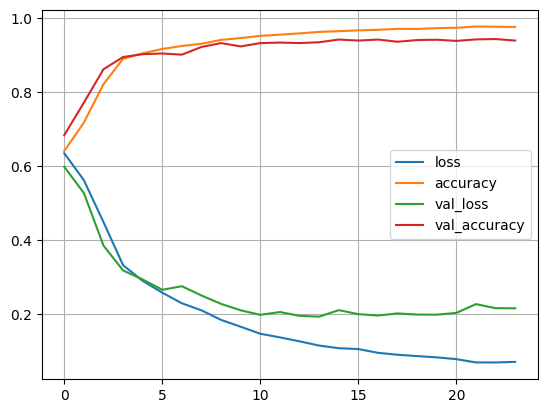

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

173/173 [==============================] - 1s 3ms/step - loss: 0.1809 - accuracy: 0.9465


[0.18093404173851013, 0.946480393409729]

In [ ]:
W, b = model.get_layer('conv2d_2').get_weights()

In [ ]:
W.shape

(3, 3, 3, 32)

In [ ]:
W[:, :, 0, 0]

array([[ 0.29552364,  0.2477912 ,  0.21326232],
       [ 0.06293719, -0.22052957, -0.15587826],
       [-0.06875916, -0.44211078, -0.35075104]], dtype=float32)

In [ ]:
W_min, W_max = W.min(), W.max()
W = (W - W_min) / (W_max - W_min)

In [ ]:
W[:, :, 0, 0]

array([[0.8881558 , 0.85113513, 0.824355  ],
       [0.70776474, 0.48791158, 0.53805435],
       [0.60562277, 0.31605604, 0.38691348]], dtype=float32)

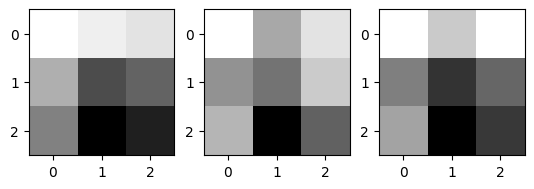

In [ ]:
plt.subplot(1,3,1)
plt.imshow(W[:, :, 0, 0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(W[:, :, 1, 0], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(W[:, :, 2, 0], cmap='gray')
plt.show()

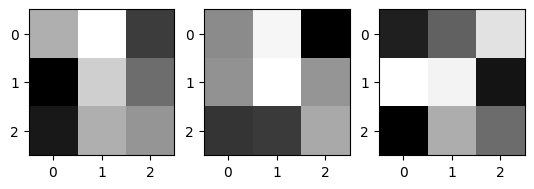

In [ ]:
plt.subplot(1,3,1)
plt.imshow(W[:, :, 0, 1], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(W[:, :, 1, 1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(W[:, :, 2, 1], cmap='gray')
plt.show()

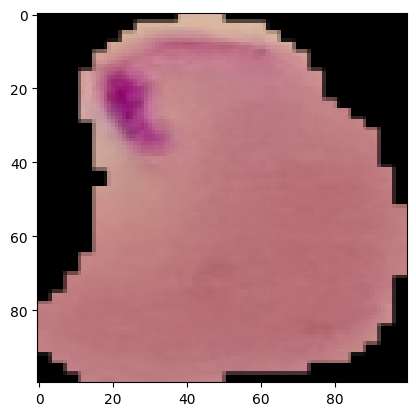

In [ ]:
cell = X_test[0, :, :, :].reshape(1, 100, 100, 3)

plt.imshow(cell[0])
plt.show()

In [ ]:
from tensorflow.keras import Model

model_1layer = Model(inputs=model.inputs, outputs=model.layers[0].output)

feature_maps = model_1layer.predict(cell)

1/1 [==============================] - 0s 36ms/step


In [ ]:
feature_maps.shape

(1, 100, 100, 32)

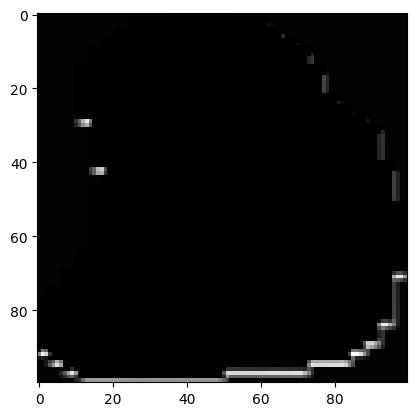

In [ ]:
plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()

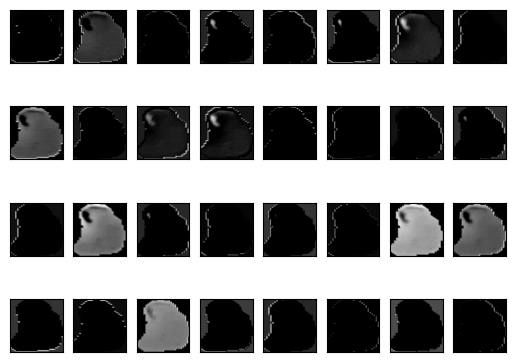

In [ ]:
# source: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
width = 8
height = 4
ix = 1
for _ in range(height):
	for _ in range(width):
		# specify subplot and turn of axis
		ax = plt.subplot(height, width, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()